In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# re-testing AODN points
import rompy
cat = rompy.cat
df=cat.aodn.nrt_wave_altimetry_points(startdt='2020-11-01',enddt='2021-04-13').read()
print(len(df))
df.head(3)

34


/home/rfonsecadasilva/anaconda3/envs/rompy-dev/lib/python3.7/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,gml_id,timeseries_id,platform_code,time_coverage_start,time_coverage_end,geospatial_lat_min,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,lon_cell,lat_cell,file_url,size,geometry
0,srs_surface_waves_altimetry_map.fid--8fcb47d_1...,2860867,SENTINEL-3A,2016-03-20T14:56:37,2020-12-13T02:11:50,-32.999817,-32.000881,111.153214,111.728432,111.440823,-32.500349,IMOS/SRS/Surface-Waves/Wave-Wind-Altimetry-DM0...,186830.0,POINT (111.44080 -32.50030)
1,srs_surface_waves_altimetry_map.fid--8fcb47d_1...,2752090,CRYOSAT-2,2010-08-09T04:25:08,2021-01-02T20:10:54,-32.999889,-32.000271,111.000320,111.999634,111.499977,-32.500080,IMOS/SRS/Surface-Waves/Wave-Wind-Altimetry-DM0...,243849.0,POINT (111.50000 -32.50010)
2,srs_surface_waves_altimetry_map.fid--8fcb47d_1...,2929084,SENTINEL-3B,2018-06-16T14:48:52,2020-12-31T02:06:02,-32.999645,-32.000141,113.000549,113.999168,113.499859,-32.499893,IMOS/SRS/Surface-Waves/Wave-Wind-Altimetry-DM0...,158734.0,POINT (113.49990 -32.49990)


In [3]:
import rompy
cat = rompy.cat
ds=cat.aodn.nrt_wave_altimetry(startdt='2020-11-01',enddt='2021-04-13',ds_filters={'subset':['SWH_C']}).to_dask()
ds

/home/rfonsecadasilva/anaconda3/envs/rompy-dev/lib/python3.7/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<xarray.Dataset>
Dimensions:    (TIME: 2738)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2020-11-15T14:56:54.000003072 ... 2020-1...
    LATITUDE   (TIME) float32 dask.array<chunksize=(68,), meta=np.ndarray>
    LONGITUDE  (TIME) float32 dask.array<chunksize=(68,), meta=np.ndarray>
Data variables:
    SWH_C      (TIME) float32 dask.array<chunksize=(68,), meta=np.ndarray>
Attributes:
    abstract:                      This database contains global data of wind...
    acknowledgement:               Any users of IMOS data are required to cle...
    author_email:                  agus.ribal@gmail.com
    author:                        Ribal, Agustinus
    citation:                      The citation in a list of references is: "...
    Conventions:                   CF-1.6,IMOS-1.4
    data_centre:                   Australian Ocean Data Network (AODN)
    data_centre_email:             info@aodn.org.au
    date_created:                  2021-01-04T07:12:21Z
    date_modified:                 2021-01-04T07:12:21Z
    disclaimer:                    Data, products and services from IMOS are ...
    geospatial_lon_max:            111.72843
    geospatial_lon_min:            111.15321
    geospatial_lat_max:            -32.00088
    geospatial_lat_min:            -32.999817
    geospatial_vertical_max:       0.0
    geospatial_vertical_min:       0.0
    geospatial_vertical_negative:  down
    institution:                   The University of Melbourne
    license:                       http://creativecommons.org/licenses/by/4.0/
    naming_authority:              IMOS
    principal_investigator_email:  ian.young@conviro.com.au
    principal_investigator:        Young, Ian
    project:                       Integrated Marine Observing System (IMOS)
    source:                        RADS
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_start:           2016-03-20T14:56:37Z
    time_coverage_end:             2020-12-13T02:11:50Z
    title:                         SENTINEL-3A altimeter wave/wind data

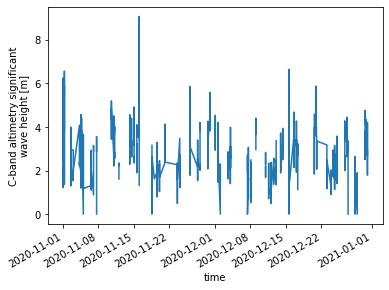

In [4]:
ds = ds.sortby('TIME')
ds.SWH_C.plot()